# Experimento 4 - Órdenes Repetitivas

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:

import sys

sys.path.append("../..")

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Use latex
plt.rc("text", usetex=True)

## Definiciones

In [22]:
from experimento import Experimento
from src.generacion import (
    GeneradorInstancias,
    DistribucionIndependiente,
    DistribucionUniforme,
    DistribucionNormal,
)
from src.modelo.modelo import ConfiguracionAsignacionCuadrillas
from src.modelo.restricciones_deseables import (
    EvitarRepeticiones,
    IgnorarRepeticiones,
    MultarRepeticiones,
)


generador = GeneradorInstancias(
    cantidad_trabajadores=DistribucionUniforme(2, 5),
    cantidad_ordenes=DistribucionUniforme(5, 20),
    parametros_ordenes=DistribucionIndependiente(
        DistribucionNormal(10000, 2000),
        DistribucionUniforme(3, 10),
    ),
    cantidad_ordenes_repetitivas=DistribucionUniforme(2, 10),
)

N = 1000
instancias = [generador.generar_instancia() for _ in range(N)]

In [23]:
experimento_ignorar = Experimento(
    nombre="exp4-ignorar",
    instancias=instancias,
    configuracion_modelo=ConfiguracionAsignacionCuadrillas(
        estrategia_repetitiva=IgnorarRepeticiones(),
    ),
)

In [24]:
experimento_evitar = Experimento(
    nombre="exp4-evitar",
    instancias=instancias,
    configuracion_modelo=ConfiguracionAsignacionCuadrillas(
        estrategia_repetitiva=EvitarRepeticiones(),
    ),
)

In [25]:
experimento_multa_baja = Experimento(
    nombre="exp4-multa-baja",
    instancias=instancias,
    configuracion_modelo=ConfiguracionAsignacionCuadrillas(
        estrategia_repetitiva=MultarRepeticiones(penalizacion=500),
    ),
)

In [26]:
experimento_multa_alta = Experimento(
    nombre="exp4-multa-alta",
    instancias=instancias,
    configuracion_modelo=ConfiguracionAsignacionCuadrillas(
        estrategia_repetitiva=MultarRepeticiones(penalizacion=3000),
    ),
)

## Ejecución

In [ ]:
resultados_ignorar = experimento_ignorar.ejecutar()

In [16]:
resultados_evitar = experimento_evitar.ejecutar()

In [17]:
resultados_multa_baja = experimento_multa_baja.ejecutar()

In [18]:
resultados_multa_alta = experimento_multa_alta.ejecutar()

## Análisis

In [19]:
from graficos import boxplot

### Distribución Objetivo

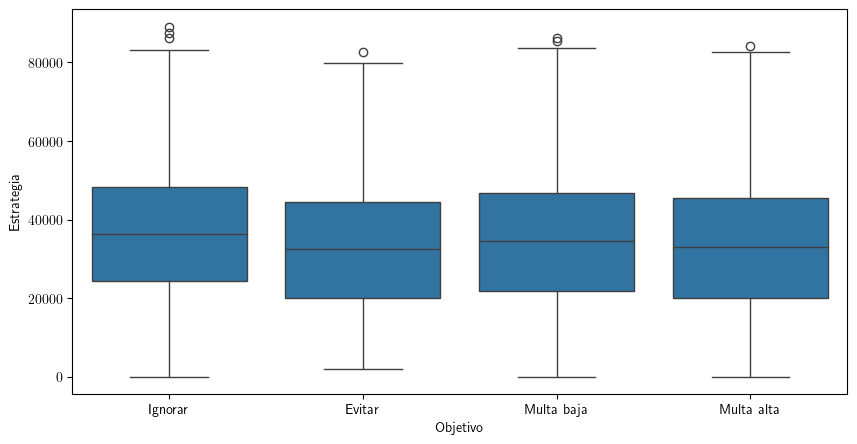

In [21]:
fig = boxplot(
    [
        resultados_ignorar.objetivos,
        resultados_evitar.objetivos,
        resultados_multa_baja.objetivos,
        resultados_multa_alta.objetivos,
    ],
    ["Ignorar", "Evitar", "Multa baja", "Multa alta"],
    xlabel="Objetivo",
    ylabel="Estrategia",
)